In [21]:
#Original location: Y:\rawdata-CQO\2019-11-06-photoncounting\Dataset2\plot.ipynb

In [22]:
from __future__ import division
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

cs = ['#AA2B4A','#006388','#7E317B','#E8E391','#9FA161','#C4E5FA'] # durham colours red,blue,purple,yellow,green,lightblue

import matplotlib as mpl; print(mpl.matplotlib_fname())
#C:\Users\cqtd55\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\mpl-data\matplotlibrc

def guessedFunction(x, m,C):
    return m*x + C

def getChi2(experiment, model, errors):
    residuals = experiment - model
    Chi2 = ((residuals/errors)**2).sum()
    return Chi2

C:\Users\renju\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [23]:
P776 = [30.0, 64.0, 81.0, 100.0,  144.0, 196.0, 225.0]
g2_max = [4.77, 4.028, 4.158, 3.635,  3.068, 3.087, 2.743]
g2_max_err = [0.141, 0.217, 0.161, 0.2, 0.127, 0.124, 0.074]

# Use lmfit to fit Dataset1

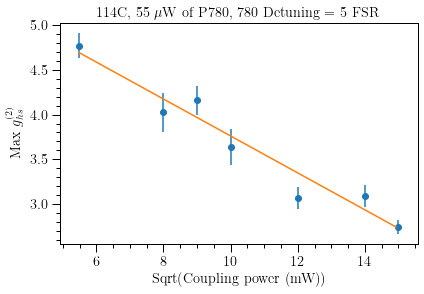

Reduced chi-squared 1.4891138135431186


In [24]:
########## Straight line fit & plot ###############################################################


########## Load all data ######################################################
x_vals_all = np.sqrt(P776); y_vals_all = np.array(g2_max); y_vals_errs_all =  np.array(g2_max_err)

########## Select data to fit #################################################
n = 8; x_vals = x_vals_all[0:n]; y_vals = y_vals_all[:n]; y_vals_errs = y_vals_errs_all[:n]

########## Create a model from the guessedFunction #############################
from lmfit import Model
mod = Model(guessedFunction) #lm_params = mod.make_params(a=1, b=1)
guess_gradient = (y_vals[1]-y_vals[0])  / (x_vals[1]- x_vals[0]) # Guess a gradient for a straight line
result = mod.fit( y_vals, x=x_vals, weights=1/y_vals_errs, m=guess_gradient, C=y_vals[0])
#print (result.fit_report())
m = result.params['m'].value; C = result.params['C'].value

########## Create predicted data from fit so that this can be plotted ##########
x_vals2 = np.arange(x_vals[0],x_vals[-1],.01); guess2 = np.array(guessedFunction(x_vals2, m, C))

########## Show the data and then the fit ######################################
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Max $g^{(2)}_{hs}$')
ax.set_xlabel('Sqrt(Coupling power (mW))')
plt.errorbar(x_vals_all, y_vals_all, y_vals_errs_all, linestyle = "", fmt =".")
plt.scatter(x_vals,y_vals)
plt.plot(x_vals2, guess2)
plt.tight_layout()
plt.title("114C, 55 $\mu$W of P780, 780 Detuning = 5 FSR")
plt.show()
#plt.scatter(x_vals, y_vals - (guessedFunction(x_vals, A)) )


###################################################################################################
########## Double check the (reduced) chi-squared manually ######################
model = (guessedFunction(x_vals, m, C)); experiment = y_vals; errors = y_vals_errs
Chi2 = getChi2(experiment, model, y_vals_errs)
#print ("Chi-squared", Chi2)
print ("Reduced chi-squared", Chi2/ (len(experiment)-1))

In [25]:
m_g2 = m; C_g2 = C

In [26]:
P776 = [30.0, 64.0, 81.0, 100.0,  144.0, 196.0, 225.0]
pair_rates = np.array([1.14735, 3.45072, 3.18956, 5.32107, 7.45854, 8.012, 10.24554])
#pair_rates_err = np.array([1.0711442479890372, 1.8576113694742504, 1.7859339293490115, 2.3067444591891837, 2.478753719109666, 2.7310327716818046, 2.8305476501906837, 3.2008655079524977])
#pair_rates_err = np.sqrt(pair_rates)
pair_rates_err = np.array([0.009685,0.14048,0.013605,0.38626008,0.32449,1.03732,0.47548]) #autosummary.xlsx

# Plot both sets of data

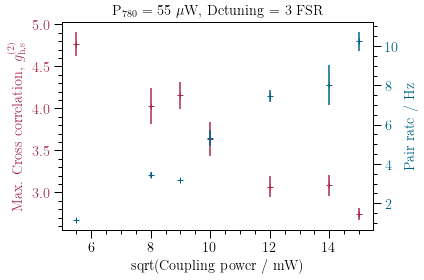

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

color = cs[0] # color = 'tab:red'

ax1.set_xlabel('sqrt(Coupling power / mW)')
ax1.set_ylabel('Max. Cross correlation, $g^{(2)}_{\\rm h,s}$', color = color)
ax1.errorbar(np.sqrt(P776),np.array(g2_max),np.array(g2_max_err), marker='+',c=color,ls='')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = cs[1] # color = 'tab:blue'
ax2.set_ylabel('Pair rate / Hz', color=color)  # we already handled the x-label with ax1
ax2.errorbar(np.sqrt(P776),pair_rates,pair_rates_err, marker='+',c=color,ls='')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('P$_{780}$ = 55 $\mathrm{\mu}$W, Detuning = 3 FSR')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('g2max-and-pair-rate-vs-coupling-power.pdf')
plt.show()

# Plot both sets of data with trendline for first set of data

In [28]:
fit_x = np.linspace(5,15,1e3)
fit_y = (m*fit_x) + C

C:\Users\renju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


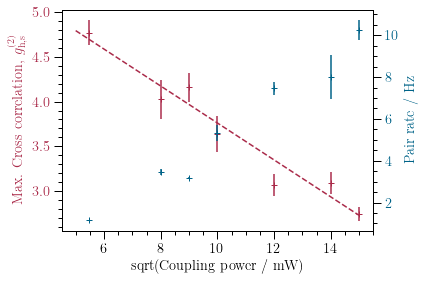

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

color = 'red' # color = 'tab:red'
color = cs[0]

ax1.set_xlabel('sqrt(Coupling power / mW)')
ax1.set_ylabel('Max. Cross correlation, $g^{(2)}_{\\rm h,s}$', color = color)
ax1.errorbar(np.sqrt(P776),np.array(g2_max),np.array(g2_max_err), marker='+',c=color,ls='')
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(fit_x,fit_y, linestyle = "--", color = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue' # color = 'tab:blue'
color = cs[1]
ax2.set_ylabel('Pair rate / Hz', color=color)  # we already handled the x-label with ax1
ax2.errorbar(np.sqrt(P776),pair_rates,pair_rates_err, marker='+',c=color,ls='')
ax2.tick_params(axis='y', labelcolor=color)

#plt.title('P$_{780}$ = 55 $\mathrm{\mu}$W, Detuning = 3 FSR')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('g2max-and-pair-rate-vs-coupling-power.pdf')
plt.show()

# Use lmfit to fit Dataset2

[[Model]]
    Model(guessedFunction)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 1.93258227
    reduced chi-square = 0.38651645
    Akaike info crit   = -5.00937153
    Bayesian info crit = -5.11755123
[[Variables]]
    m:  0.88605649 +/- 0.07341356 (8.29%) (init = 0.9130305)
    C: -3.82333406 +/- 0.64238882 (16.80%) (init = 1.14735)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, C) = -0.940


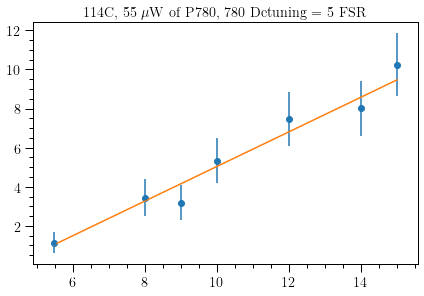

Chi-squared 1.9325822714176168
Reduced chi-squared 0.3220970452362695


In [30]:
# Straight line

# Load all data
x_vals_all = np.sqrt(P776)
y_vals_all = np.array(pair_rates)
y_vals_errs_all =  np.sqrt(np.array(pair_rates))/2#  np.array([0.1]*8) # np.array([pair_rates_err])
#y_vals_errs_all = np.array(pair_rates_err)*2
# Select data to fit
n = 8
x_vals = x_vals_all[:n]
y_vals = y_vals_all[:n]
y_vals_errs = y_vals_errs_all[:n]

def guessedFunction(x, m,C):
    return m*x + C

# Create a model from the guessedFunction
from lmfit import Model
mod = Model(guessedFunction) #lm_params = mod.make_params(a=1, b=1)
guess_gradient = (y_vals[1]-y_vals[0])  / (x_vals[1]- x_vals[0]) # Guess a gradient for a straight line
result = mod.fit( y_vals, x=x_vals, weights=1/y_vals_errs, m=guess_gradient, C=y_vals[0])
print (result.fit_report())

m = result.params['m'].value
C = result.params['C'].value

# Create predicted data from fit so that this can be plotted 
x_vals2 = np.arange(x_vals[0],x_vals[-1],.01)
guess2 = np.array(guessedFunction(x_vals2, m, C))

# Show the data and then the fit
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax.set_ylabel('Pair rate')
ax.set_xlabel('Sqrt(Coupling power (mW))')
plt.errorbar(x_vals_all, y_vals_all, y_vals_errs_all, linestyle = "", fmt =".")
plt.scatter(x_vals,y_vals)
plt.plot(x_vals2, guess2)
plt.tight_layout()
#plt.savefig('figures/g2max_vs_Sqrt(CouplingPower).pdf')
#plt.savefig('figures/g2max_vs_Sqrt(CouplingPower).png')
plt.title("114C, 55 $\mu$W of P780, 780 Detuning = 5 FSR")
plt.show()

#plt.scatter(x_vals, y_vals - (guessedFunction(x_vals, A)) )

######################################################
# Double check the (reduced) chi-squared manually
def getChi2(experiment, model, errors):
    residuals = experiment - model
    Chi2 = ((residuals/errors)**2).sum()
    return Chi2

model = (guessedFunction(x_vals, m, C))
experiment = y_vals
errors = y_vals_errs

Chi2 = getChi2(experiment, model, y_vals_errs)

print ("Chi-squared", Chi2)
print ("Reduced chi-squared", Chi2/ (len(experiment)-1))

# Plot Dataset2

In [31]:
m_pairrate = m
C_pairrate = C

C:\Users\renju\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\renju\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


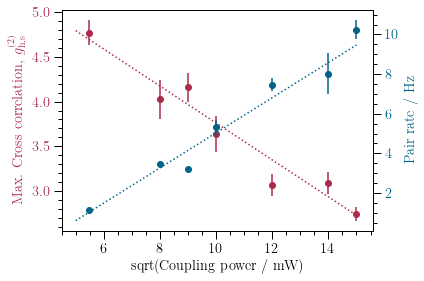

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

color = 'red' # color = 'tab:red'
color = cs[0]

ax1.set_xlabel('sqrt(Coupling power / mW)')
ax1.set_ylabel('Max. Cross correlation, $g^{(2)}_{\\rm h,s}$', color = color)
ax1.errorbar(np.sqrt(P776),np.array(g2_max),np.array(g2_max_err), marker='+',c=color,ls='')
ax1.scatter(np.sqrt(P776),np.array(g2_max),c=color)
ax1.tick_params(axis='y', labelcolor=color)


fit_x = np.linspace(5,15,1e3)
fit_y = (m_g2*fit_x) + C_g2
ax1.plot(fit_x,fit_y, linestyle = ":", color = color)



#pair_rates_err = pair_rates_err*2

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue' # color = 'tab:blue'
color = cs[1]

fit_x = np.linspace(5,15,1e3)
fit_y = (m_pairrate*fit_x) + C_pairrate
ax2.plot(fit_x,fit_y, linestyle = ":", color = color)

ax2.set_ylabel('Pair rate / Hz', color=color)  # we already handled the x-label with ax1
ax2.errorbar(np.sqrt(P776),pair_rates,pair_rates_err, marker='+',c=color,ls='')
ax2.scatter(np.sqrt(P776),np.array(pair_rates),c=color)
ax2.tick_params(axis='y', labelcolor=color)


#plt.title('P$_{780}$ = 55 $\mathrm{\mu}$W, Detuning = 3 FSR')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('g2max-and-pair-rate-vs-coupling-power.pdf')
plt.show()

# Plot Dataset1 and Dataset 2 with trendline1 and trendline2

C:\Users\renju\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\renju\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


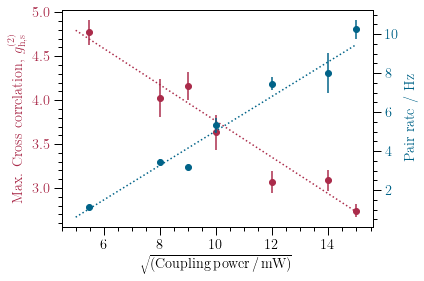

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

color = 'red' # color = 'tab:red'
color = cs[0]

ax1.set_xlabel('$\sqrt{\mathrm{(Coupling} \, \mathrm{power} \, / \, \mathrm{mW)}}$')
ax1.set_ylabel('Max. Cross correlation, $g^{(2)}_{\\rm h,s}$', color = color)
ax1.errorbar(np.sqrt(P776),np.array(g2_max),np.array(g2_max_err), marker='+',c=color,ls='')
ax1.scatter(np.sqrt(P776),np.array(g2_max),c=color)
ax1.tick_params(axis='y', labelcolor=color)


fit_x = np.linspace(5,15,1e3)
fit_y = (m_g2*fit_x) + C_g2
ax1.plot(fit_x,fit_y, linestyle = ":", color = color)



#pair_rates_err = pair_rates_err*2

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'blue' # color = 'tab:blue'
color = cs[1]

fit_x = np.linspace(5,15,1e3)
fit_y = (m_pairrate*fit_x) + C_pairrate
ax2.plot(fit_x,fit_y, linestyle = ":", color = color)

ax2.set_ylabel('Pair rate / Hz', color=color)  # we already handled the x-label with ax1
ax2.errorbar(np.sqrt(P776),pair_rates,pair_rates_err, marker='+',c=color,ls='')
ax2.scatter(np.sqrt(P776),np.array(pair_rates),c=color)
ax2.tick_params(axis='y', labelcolor=color)


#plt.title('P$_{780}$ = 55 $\mathrm{\mu}$W, Detuning = 3 FSR')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('g2max-and-pair-rate-vs-coupling-power2.pdf')
plt.show()